**Basemap Tutorial**

This  brief tutorial will look at the Basemap toolkit extension for matplotlib. Basemap allows you to create map plots in python. It extends matplotlib's functionality by adding  geographical projections and some datasets for plotting coast lines and political boundaries, among other things.

We only have time to cover a few examples here, which I have modified from a few places:

[Basemap online documentation](https://matplotlib.org/basemap/users/index.html)

[Basemap tutorial](https://basemaptutorial.readthedocs.io/en/latest/index.html)



***Installation***

In a terminal shell type:
~~~
$ conda install basemap 
~~~

Or use the Anaconda Navigator to install basemap. Click on the Environments panel, search for the basemap package then select and apply.

For our tutorial, we will also be loading some data files that use the netCDF4 format, so you will also need to install netcdf4 if you don't have it already:
~~~
$ conda install netcdf4 
~~~


**Simple Maps**

To start, import Basemap as well as matplotlib and numpy:

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

Let's see what Basemap has to offer:

In [2]:
 Basemap?

Our first example will create a mercator projection plot of the continents.

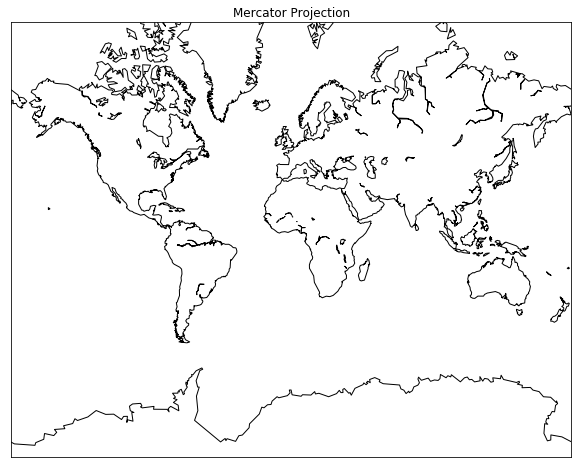

In [3]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
plt.title("Mercator Projection")
plt.show()

Now let's make a similar plot but with additiona Basemap options that make it look better:

Text(0.5,1,'Mercator Projection')

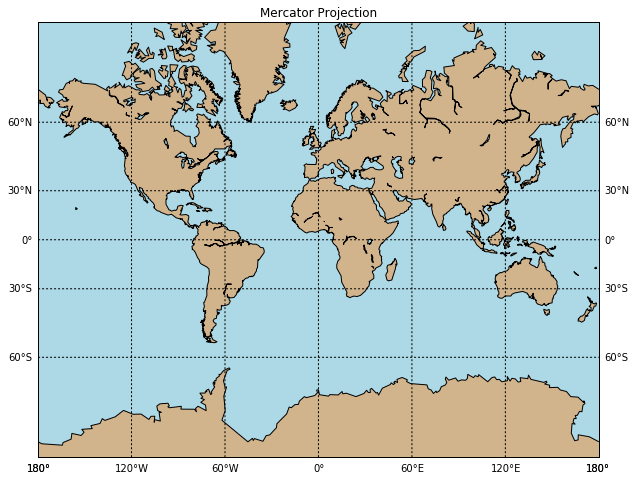

In [4]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("Mercator Projection")


Now let's try the same sequence of commands but with a differnt projection:

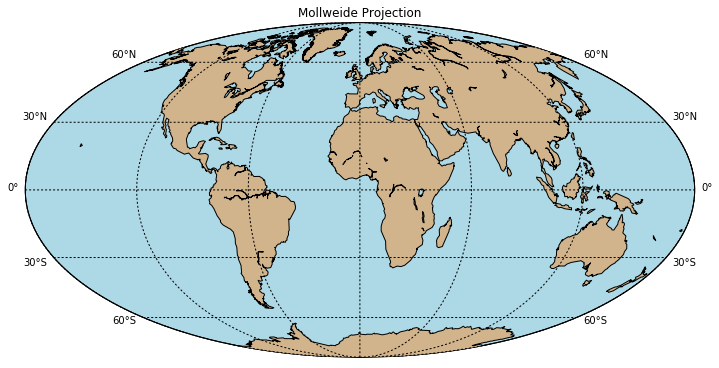

In [5]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='moll',lon_0=0,resolution='c')    
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("Mollweide Projection");

 Now let's create a map centered on North America with lines showing the country and state boundaries as well as  rivers:

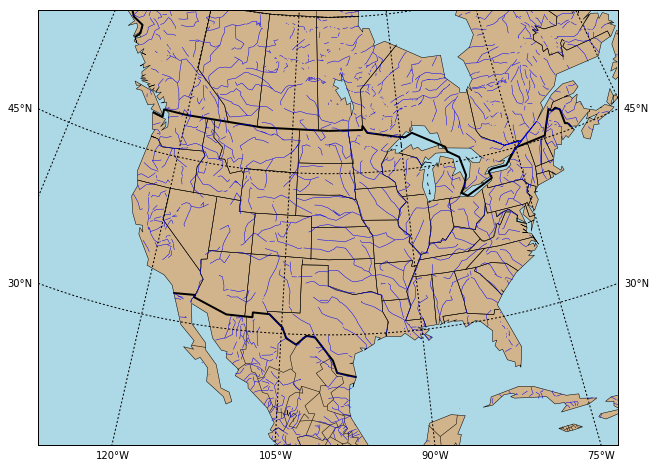

In [6]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

Here's a how to add a great cirle path and text labels at two locations:

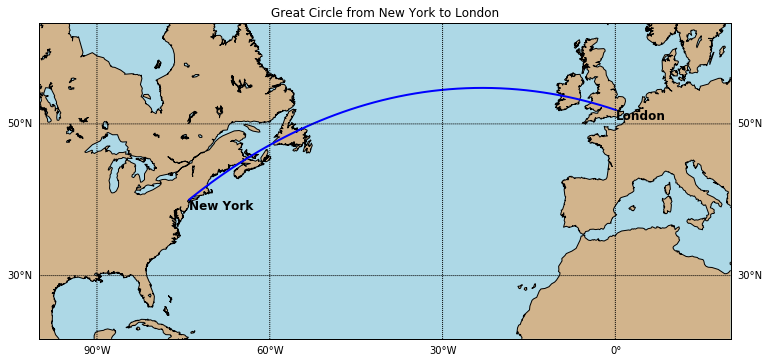

In [7]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 8) )
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


# When you use regular matplotlib commands, you need to get the mapping from the
# map projection to x,y that matplotlib uses. This is accomplished using the Basemap object,
# here which is assigned to be m()
x, y = m(lonlon, lonlat)  
plt.text(x, y, 'London',fontsize=12,fontweight='bold', ha='left',va='top',color='k')

x, y = m(nylon, nylat)  
plt.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='top',color='k')

ax.set_title('Great Circle from New York to London');

Here's an example taken from the NOAA Wave Watch III website (http://polar.ncep.noaa.gov/waves/examples/usingpython.shtml). 

This example will read in a recent WW3 model and plot up the significant wave height:

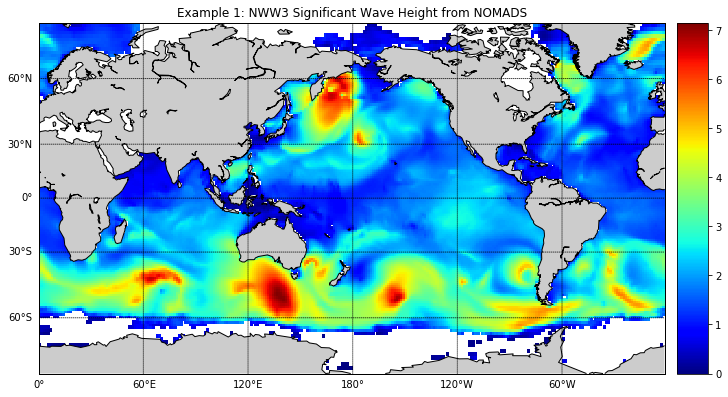

In [8]:
import netCDF4

# set up the figure
plt.figure()

# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

mydate='20171101'  # this needs to be a recent data since only recent models are available for download
url='http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS');

The examples below read in a NOAA climate model for average daily surface temperature in 2016 and make map plots of the first day's values:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.6M  100 10.6M    0     0   508k      0  0:00:21  0:00:21 --:--:--  732k:31  328k


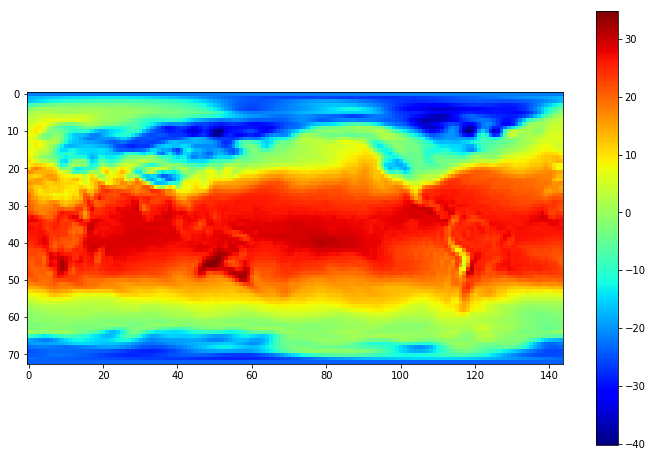

In [9]:
# download with curl
!curl -O https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.dailyavgs/surface/air.sig995.2016.nc
    
f = netCDF4.Dataset('air.sig995.2016.nc')
fig=plt.figure(figsize=(12, 8) )
air = f.variables['air']
air_c = air[:]-  273.15
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]
plt.imshow(air_c[0,:,:],cmap=plt.cm.get_cmap('jet'))
plt.colorbar()

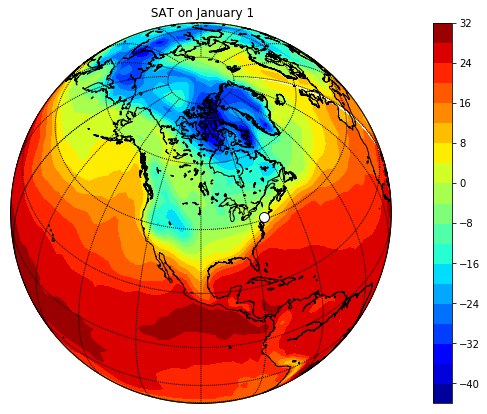

In [10]:
m = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_c[0,:,:],20,cmap=plt.cm.get_cmap('jet'))
plt.title(' SAT on January 1')
plt.colorbar();

# Add a dot showing the location of NYC:
nylat = 40.78; nylon = -73.98
x, y = m(nylon,nylat)
nyc = plt.plot(x,y,'wo')
plt.setp(nyc,'markersize',10.,'markeredgecolor','k');

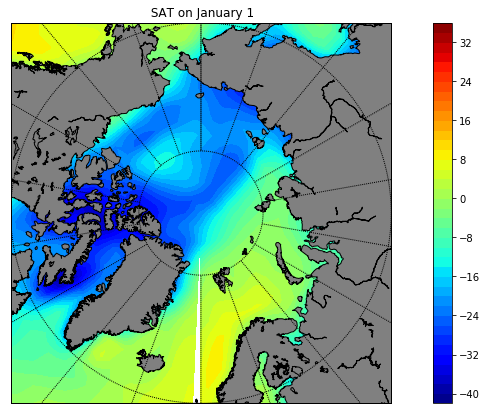

In [11]:
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(15,7))
m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.contourf(x,y,air_c[0,:,:],40,cmap=plt.cm.get_cmap('jet'))
plt.title(' SAT on January 1')
plt.colorbar();